In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
df = pd.read_csv(r"EasyVisa.csv")

In [4]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [5]:
numerical_features=[x for x in df.columns if df[x].dtype !='O' ]
categorical_features=[x for x in df.columns if df[x].dtype =='O' ]

In [10]:
print(f"we have {len(numerical_features)} numerical fetures and they are {numerical_features}")
print(f"we have {len(categorical_features)} categorical_features and they are {categorical_features}")


we have 3 numerical fetures and they are ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
we have 9 categorical_features and they are ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [15]:
for i in categorical_features:
    print(df[i].value_counts(normalize=True)*100)
    print("--------------------")



case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
--------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
--------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
--------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
--------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
--------------------
region_of_employment
Northeast    28.237834
South        27.539246
Wes

In [10]:
from ydata_profiling import ProfileReport
import pandas as pd

df = pd.read_csv("EasyVisa.csv")
profile = ProfileReport(df, title="My EDA Report", explorative=True)
profile.to_file("report.html")


/opt/anaconda3/envs/visa/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 145.77it/s]


In [11]:
df['prevailing_wage'].describe()

count     25480.000000
mean      74455.814592
std       52815.942327
min           2.136700
25%       34015.480000
50%       70308.210000
75%      107735.512500
max      319210.270000
Name: prevailing_wage, dtype: float64

insights:

1)

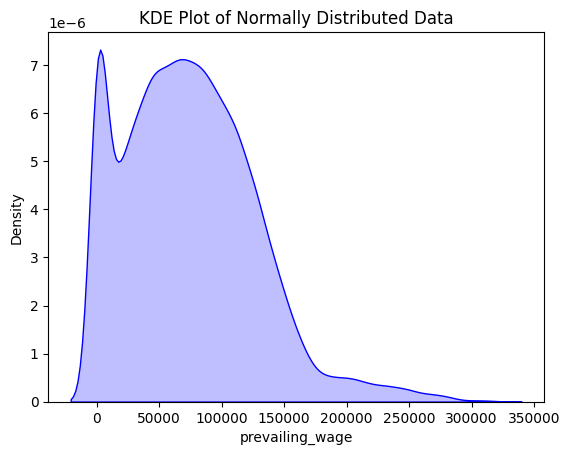

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Example data
import numpy as np


# KDE plot
sns.kdeplot(df['prevailing_wage'], fill=True, color='blue')
plt.title('KDE Plot of Normally Distributed Data')
plt.xlabel('prevailing_wage')
plt.ylabel('Density')
plt.show()


1)Bi-Modal -two clusters may be present
2)1st peak-low salary jobs
  2nd peak-high salary jobs

3)right skewed,most values are present in lower end.

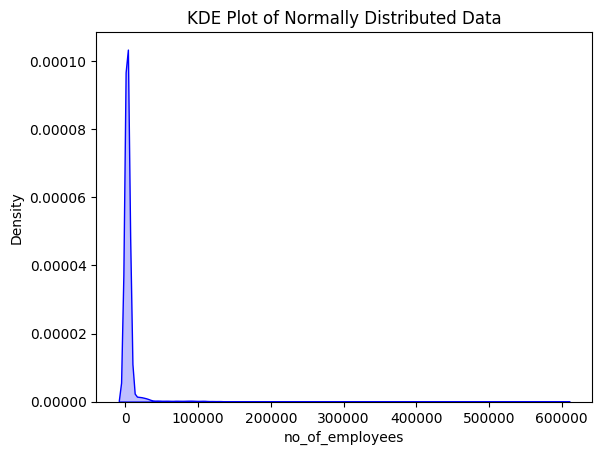

In [16]:
sns.kdeplot(df["no_of_employees"], fill=True, color='blue')
plt.title('KDE Plot of Normally Distributed Data')
plt.xlabel('no_of_employees')
plt.ylabel('Density')
plt.show()

narrow peak,long tail-may be outliers.right skewed



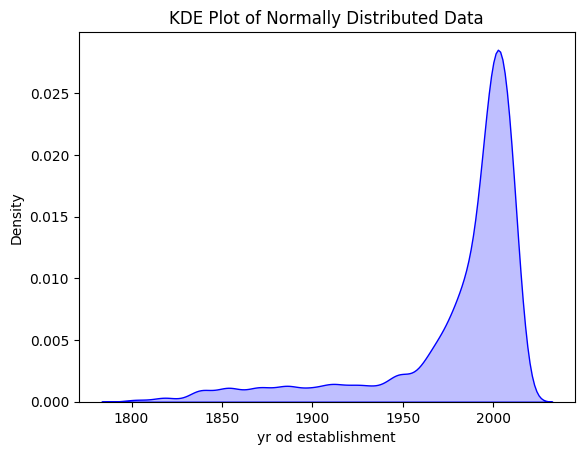

In [17]:
sns.kdeplot(df['yr_of_estab'], fill=True, color='blue')
plt.title('KDE Plot of Normally Distributed Data')
plt.xlabel('yr od establishment')
plt.ylabel('Density')
plt.show()

1)left skewed data,maybe presesnce of outliers.
2)many comanies are started in the range of 1970 to 2000

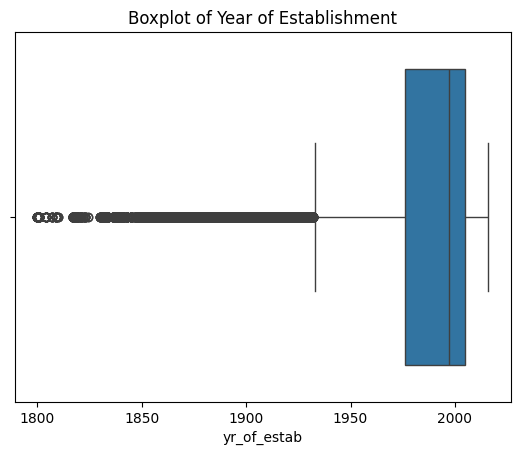

In [19]:
sns.boxplot(x=df['yr_of_estab'])
plt.title("Boxplot of Year of Establishment")
plt.show()

these are outliers,most of the data presetn right.
shouldnt remove the outliers blindly.

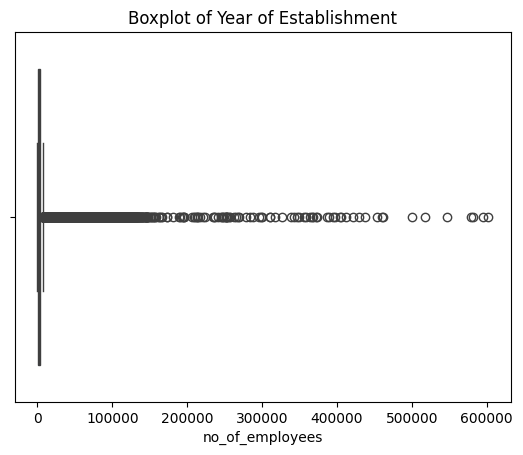

In [20]:
sns.boxplot(x=df['no_of_employees'])
plt.title("Boxplot of Year of Establishment")
plt.show()

many outliers

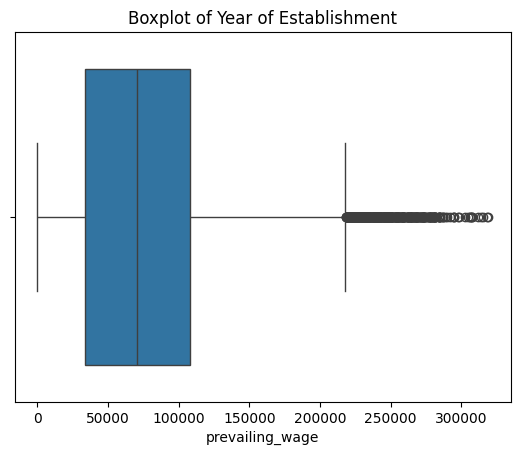

In [22]:
sns.boxplot(x=df['prevailing_wage'])
plt.title("Boxplot of Year of Establishment")
plt.show()


presence of outliers

Univariate analysis-for category values

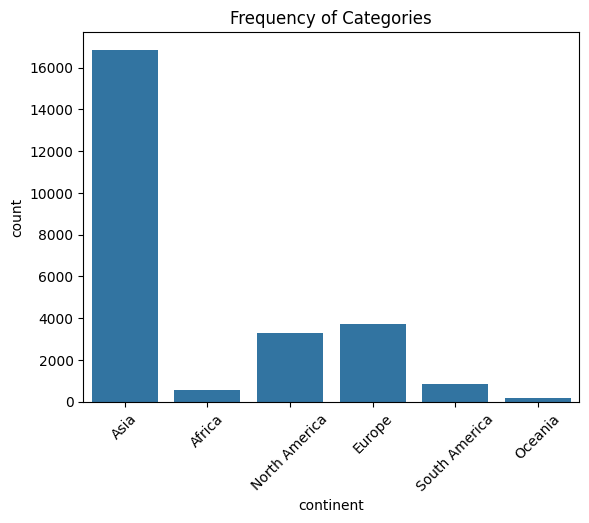

In [25]:
sns.countplot(x=df["continent"], data=df)
plt.title('Frequency of Categories')
plt.xticks(rotation=45)
plt.show()

In [ ]:

asia is the most applicants

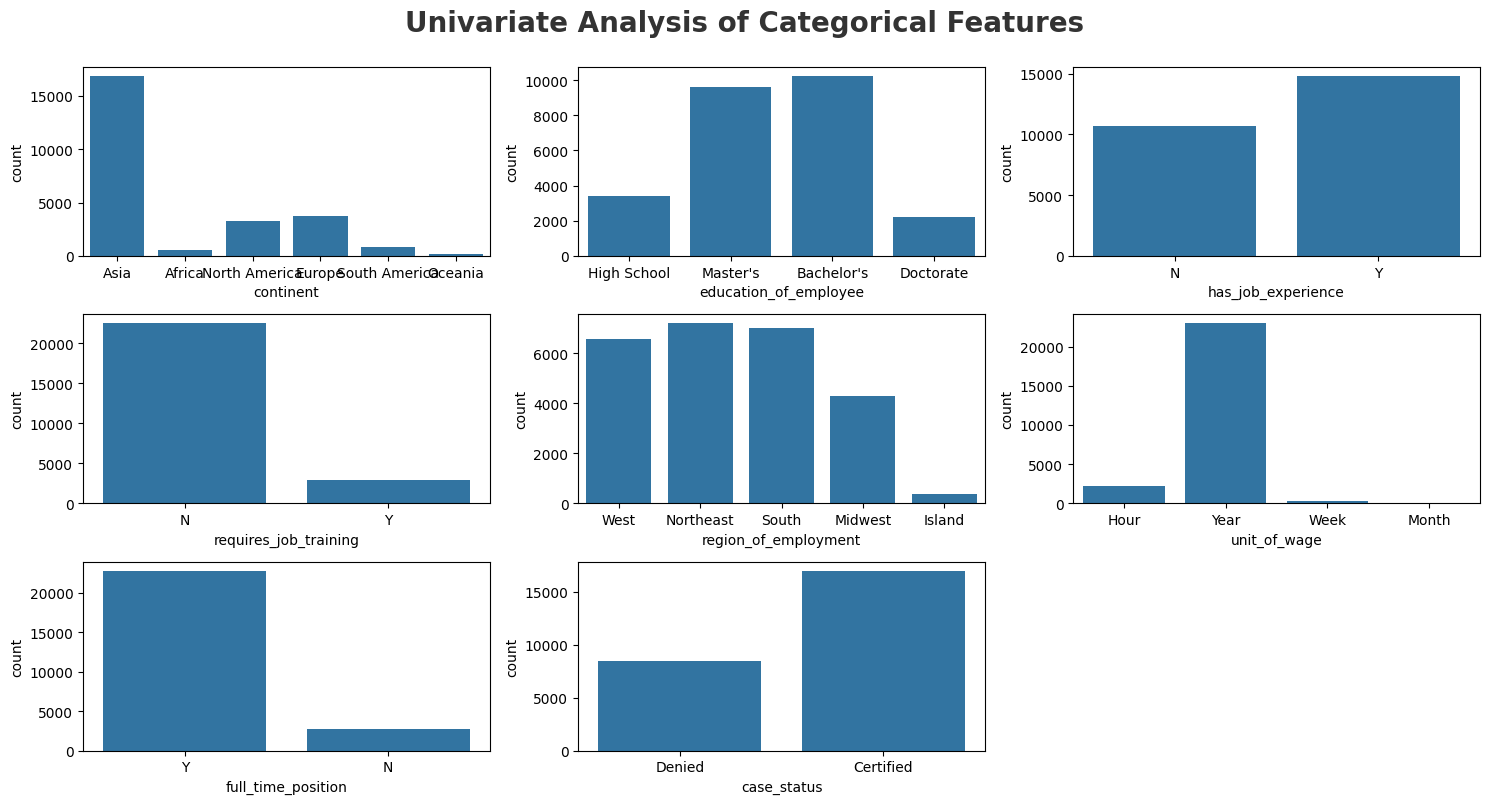

In [28]:
categorical_features.remove('case_id')
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

MULTIVARIATE ANALYSIS

In [8]:
discrete_features=[feature for feature in numerical_features if len(df[feature].unique())<=25]

continuous_features=[feature for feature in numerical_features if len(df[feature].unique()) > 25]

print('We have {} discrete features : {}'.format(len(discrete_features), discrete_features))
print('\nWe have {} continuous_features : {}'.format(len(continuous_features), continuous_features))

We have 0 discrete features : []

We have 3 continuous_features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


Correlation Matrix:
                 no_of_employees  yr_of_estab  prevailing_wage
no_of_employees         1.000000    -0.017770        -0.009523
yr_of_estab            -0.017770     1.000000         0.012342
prevailing_wage        -0.009523     0.012342         1.000000


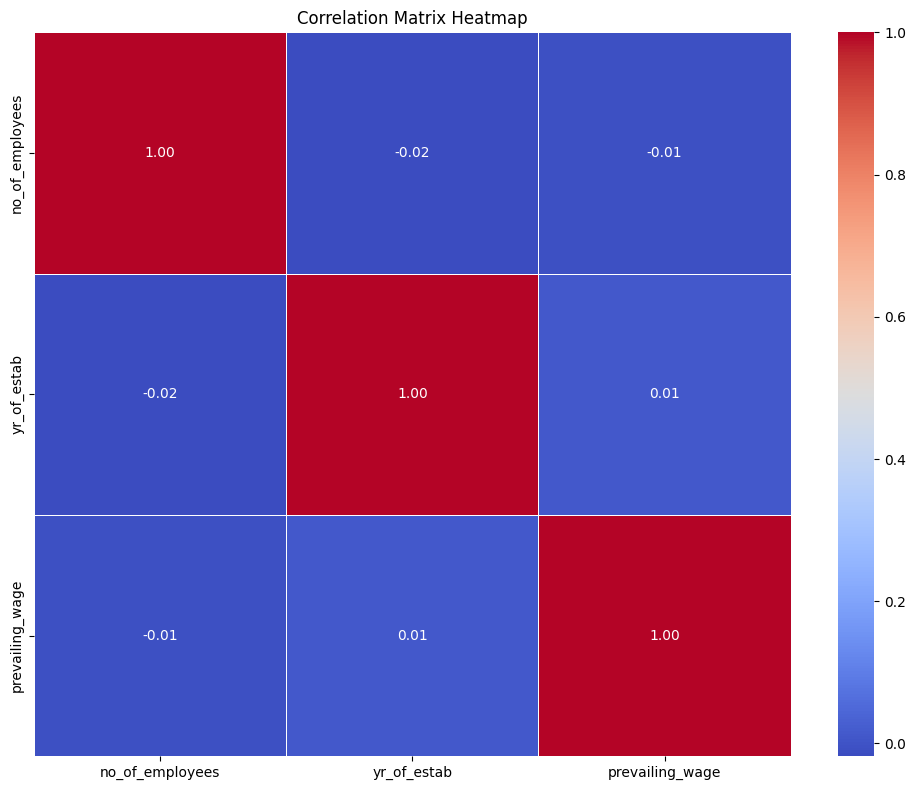

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


numeric_df = df.select_dtypes(include=['int64', 'float64'])


corr_matrix = numeric_df.corr()


print("Correlation Matrix:")
print(corr_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()


no correlation between numerical matrix


In [ ]:

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv("EasyVisa.csv") 


def check_categorical_multicollinearity(df, vif_threshold=5.0):
    
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

    if not categorical_cols:
        print("No categorical features found.")
        return pd.DataFrame()

    
    encoder = OneHotEncoder(drop='first', sparse=False)
    encoded_array = encoder.fit_transform(df[categorical_cols])
    encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_cols))

    
    X = add_constant(encoded_df)

    
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    
    vif_result = vif_data[vif_data["VIF"] > vif_threshold].sort_values(by="VIF", ascending=False)

    return vif_result


high_vif_features = check_categorical_multicollinearity(df, vif_threshold=5.0)


print(" High Multicollinearity Found in These Encoded Categorical Features:")
display(high_vif_features)


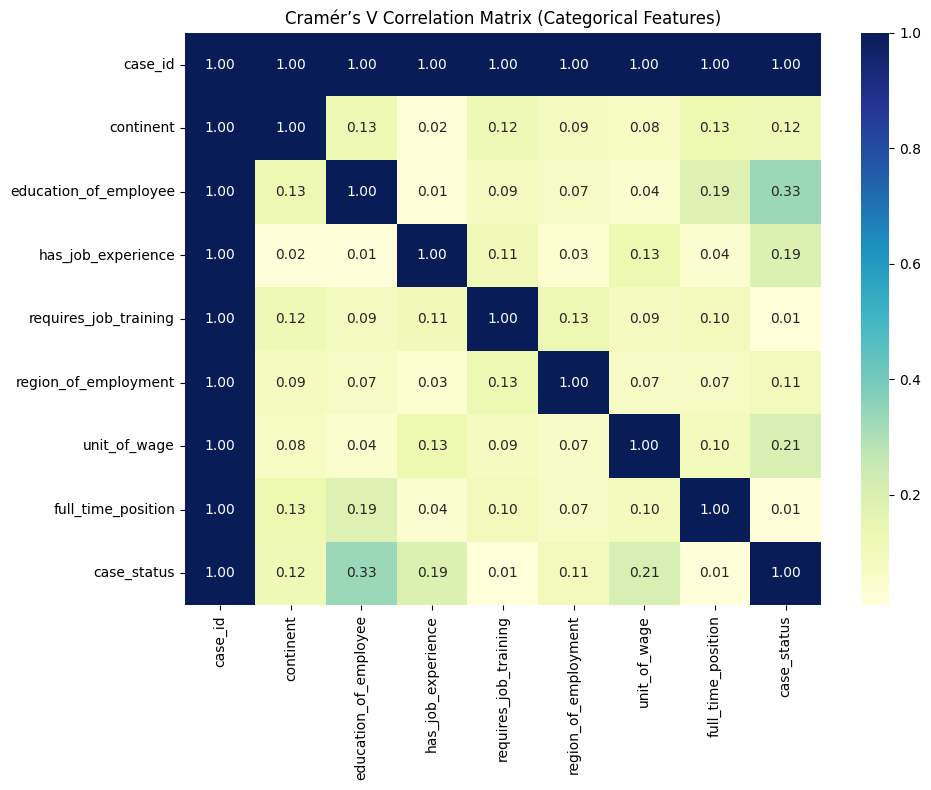

In [3]:
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np
df = pd.read_csv("EasyVisa.csv")
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    if confusion_matrix.shape[0] == 1 or confusion_matrix.shape[1] == 1:
        return np.nan
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt((chi2 / n) / (min(k - 1, r - 1)))

# Pairwise Cramér's V matrix
def cramers_v_matrix(df, categorical_cols):
    matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)
    for col1 in categorical_cols:
        for col2 in categorical_cols:
            if col1 == col2:
                matrix.loc[col1, col2] = 1.0
            else:
                matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
    return matrix.astype(float)

# Usage
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
cramer_matrix = cramers_v_matrix(df, categorical_cols)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(cramer_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Cramér’s V Correlation Matrix (Categorical Features)")
plt.tight_layout()
plt.show()


In [6]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,case_id,Fail to Reject Null Hypothesis
1,continent,Reject Null Hypothesis
2,education_of_employee,Reject Null Hypothesis
3,has_job_experience,Reject Null Hypothesis
4,requires_job_training,Fail to Reject Null Hypothesis
5,region_of_employment,Reject Null Hypothesis
6,unit_of_wage,Reject Null Hypothesis
7,full_time_position,Reject Null Hypothesis
8,case_status,Reject Null Hypothesis


requires_job_trining is not corellated to the case_status

/var/folders/gz/92yf2ypd5sq5bctxjz437t2c0000gn/T/ipykernel_2617/393754570.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='case_status', y=col,  palette=clr1, ax=ax[i,0])
/var/folders/gz/92yf2ypd5sq5bctxjz437t2c0000gn/T/ipykernel_2617/393754570.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='case_status', y=col,  palette=clr1, ax=ax[i,0])
/var/folders/gz/92yf2ypd5sq5bctxjz437t2c0000gn/T/ipykernel_2617/393754570.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='case_status', y=col,  palette=clr1, a

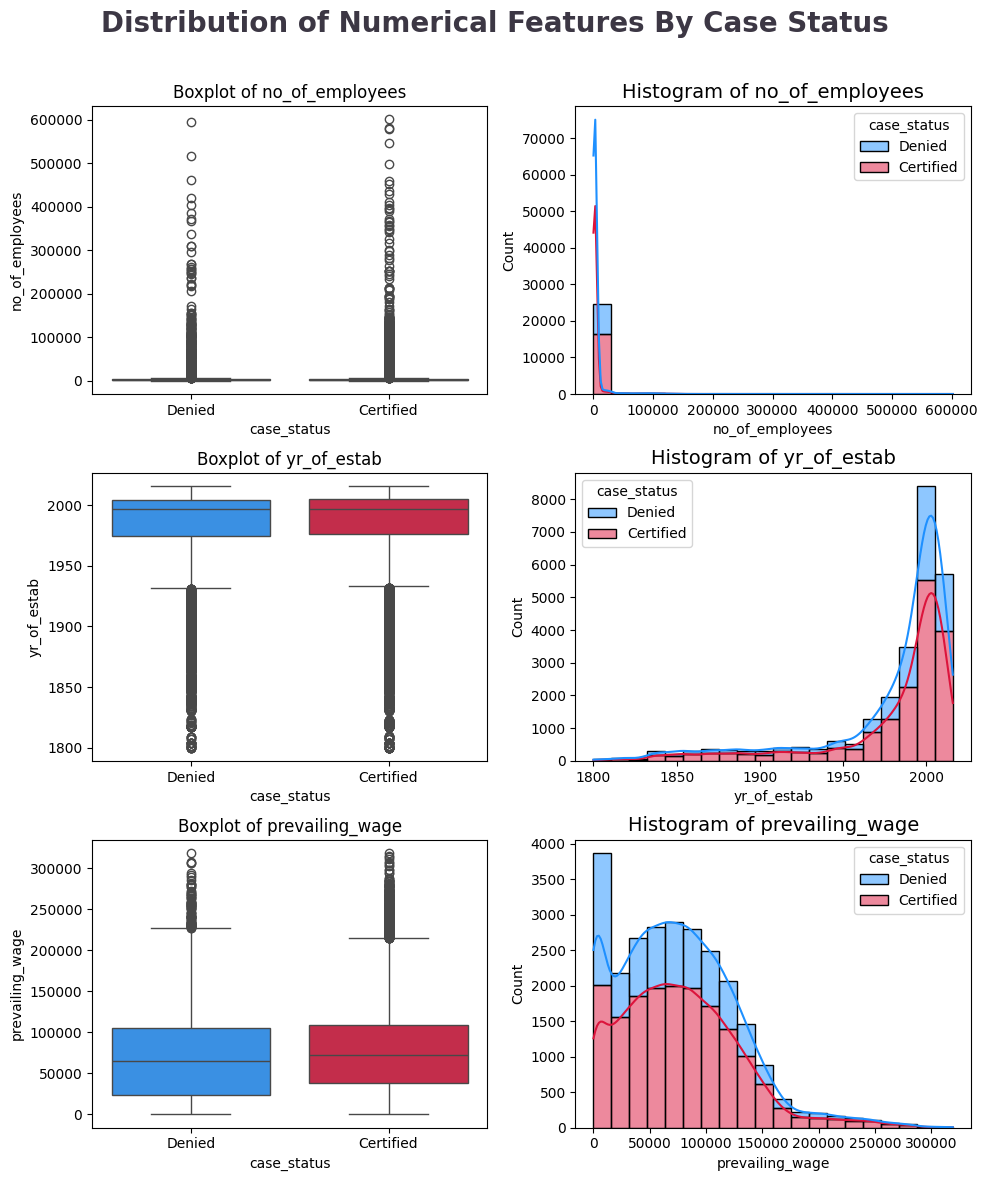

In [10]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Features By Case Status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(continuous_features):   
    sns.boxplot(data=df, x='case_status', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)

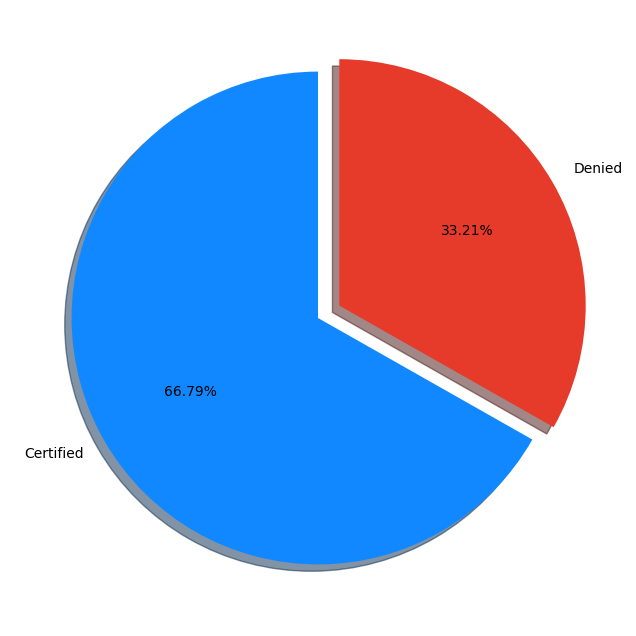

In [11]:
percentage = df.case_status.value_counts(normalize=True)*100
labels = ["Certified","Denied"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

they are imbalanced data


CONTINENT VS VISA STATUS

In [12]:
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

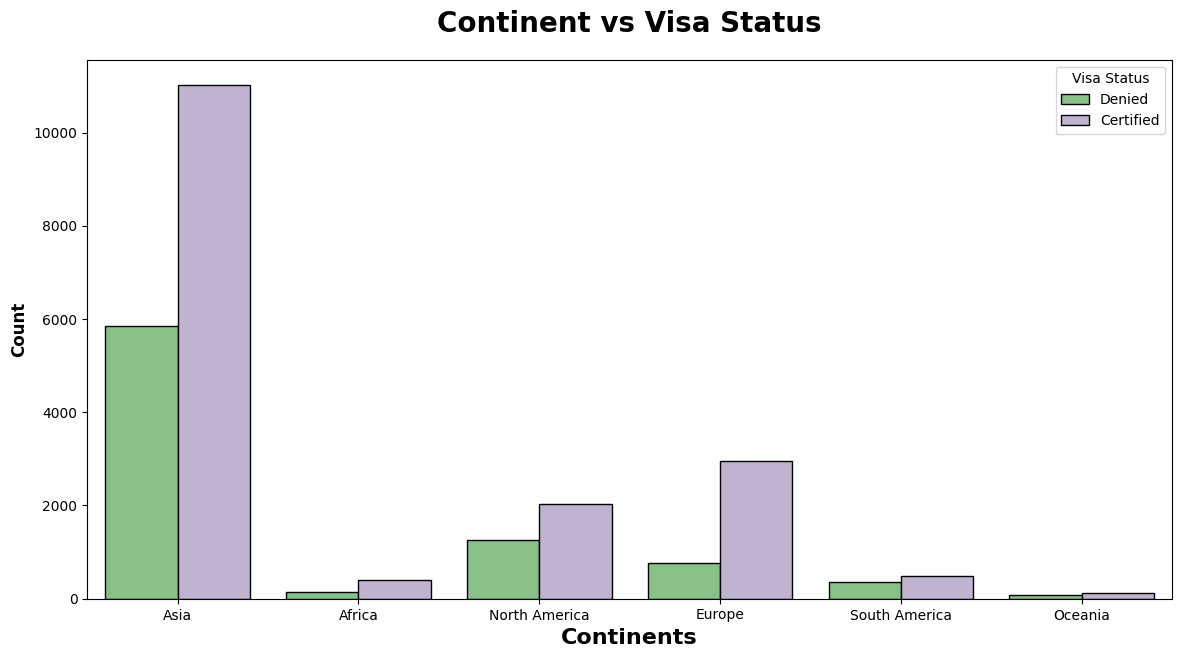

In [13]:
plt.subplots(figsize=(14,7))
sns.countplot(x="continent",hue="case_status", data=df, ec = "black",palette="Accent")
plt.title("Continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Continents", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

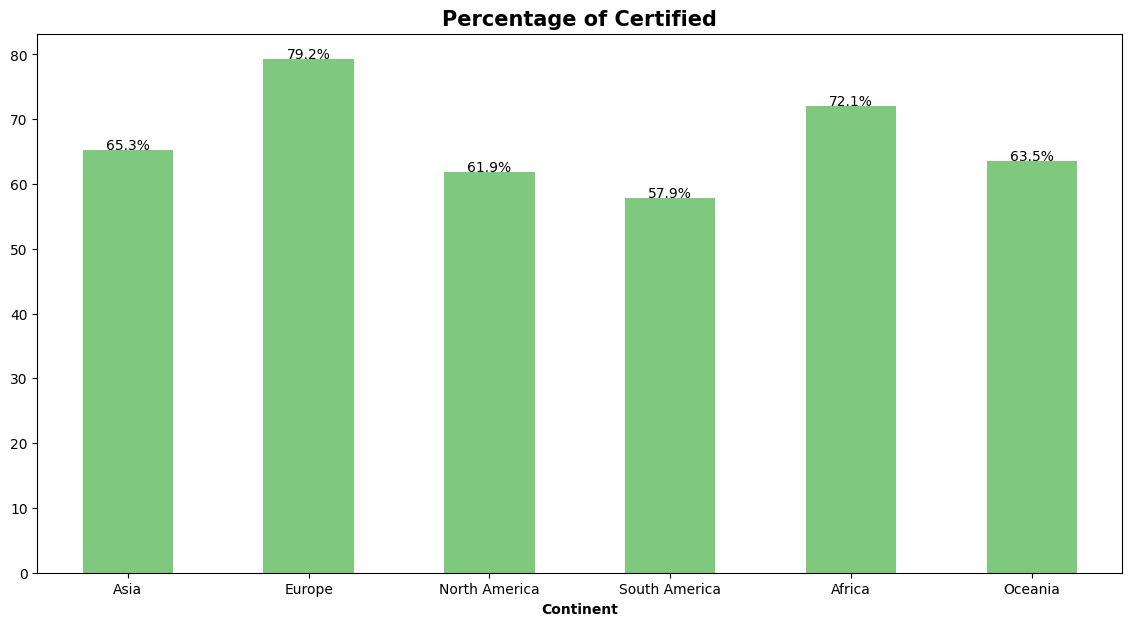

In [14]:
df2 = df.copy()
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('Continent' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

EDUCATION VS VISA STATUS

In [15]:
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

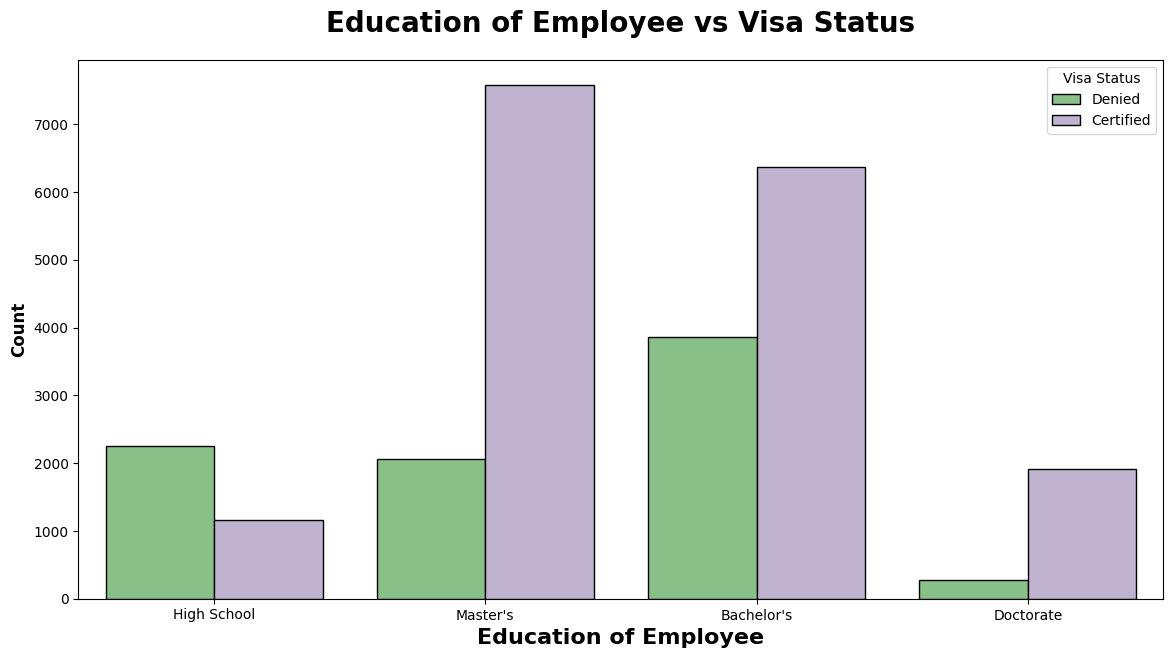

In [16]:
plt.subplots(figsize=(14,7))
sns.countplot(x="education_of_employee",hue="case_status", data=df, ec = "black",palette="Accent")
plt.title("Education of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Education of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

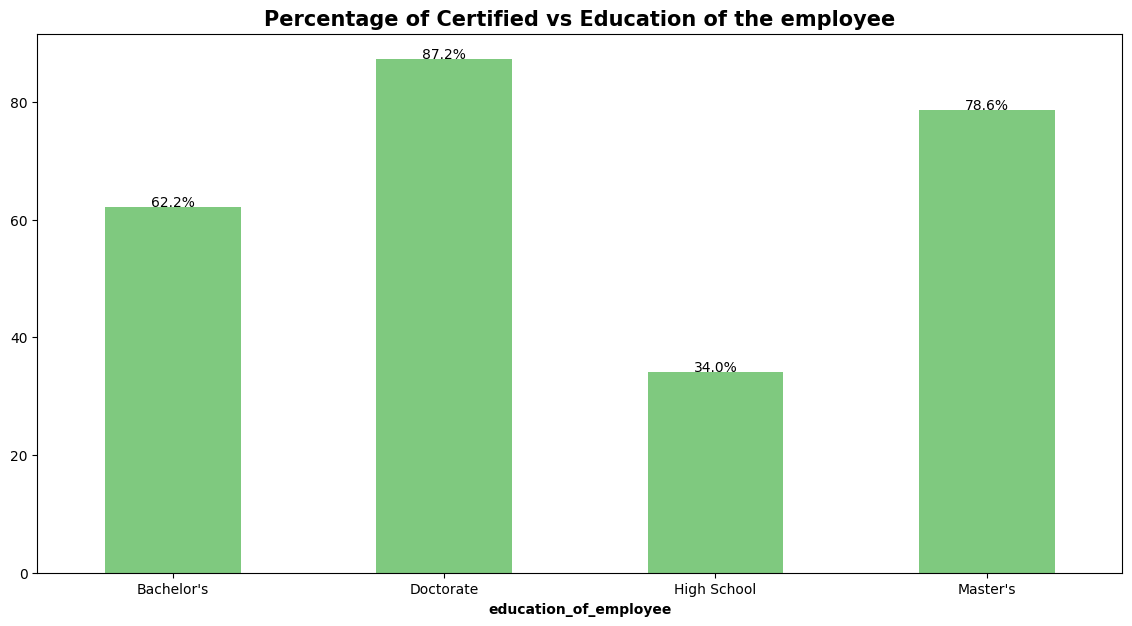

In [17]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Education of the employee" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('education_of_employee' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

applicants prev work vs VISA

In [18]:
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

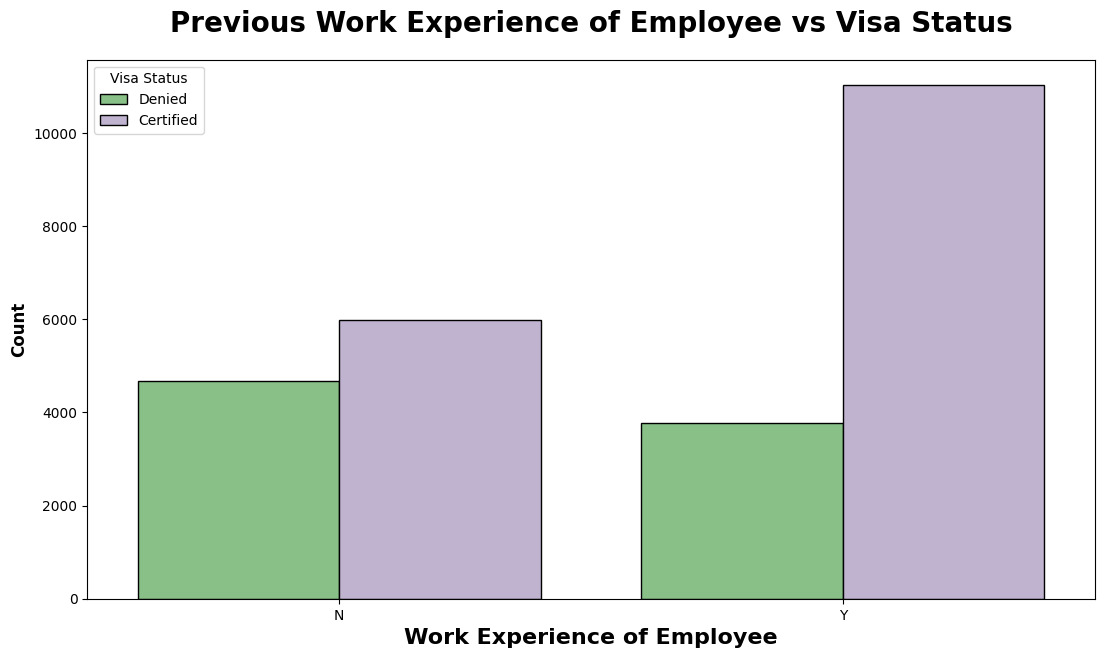

In [19]:
plt.subplots(figsize=(13,7))
sns.countplot(x="has_job_experience",hue="case_status", data=df, ec= "black",palette="Accent")
plt.title("Previous Work Experience of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Work Experience of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

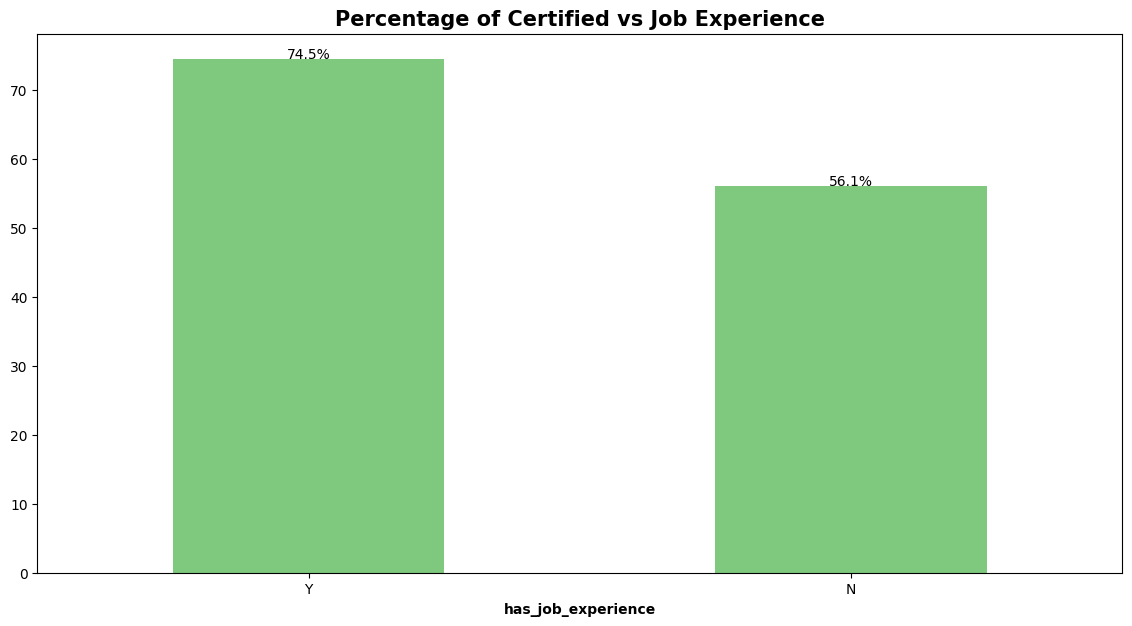

In [20]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs Job Experience" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('has_job_experience' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

training job required or not?? vs visa_status


In [21]:
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

In [4]:
import pandas as pd
df=pd.read_csv("EasyVisa.csv")
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

In [ ]:
No of employees vs Visa status

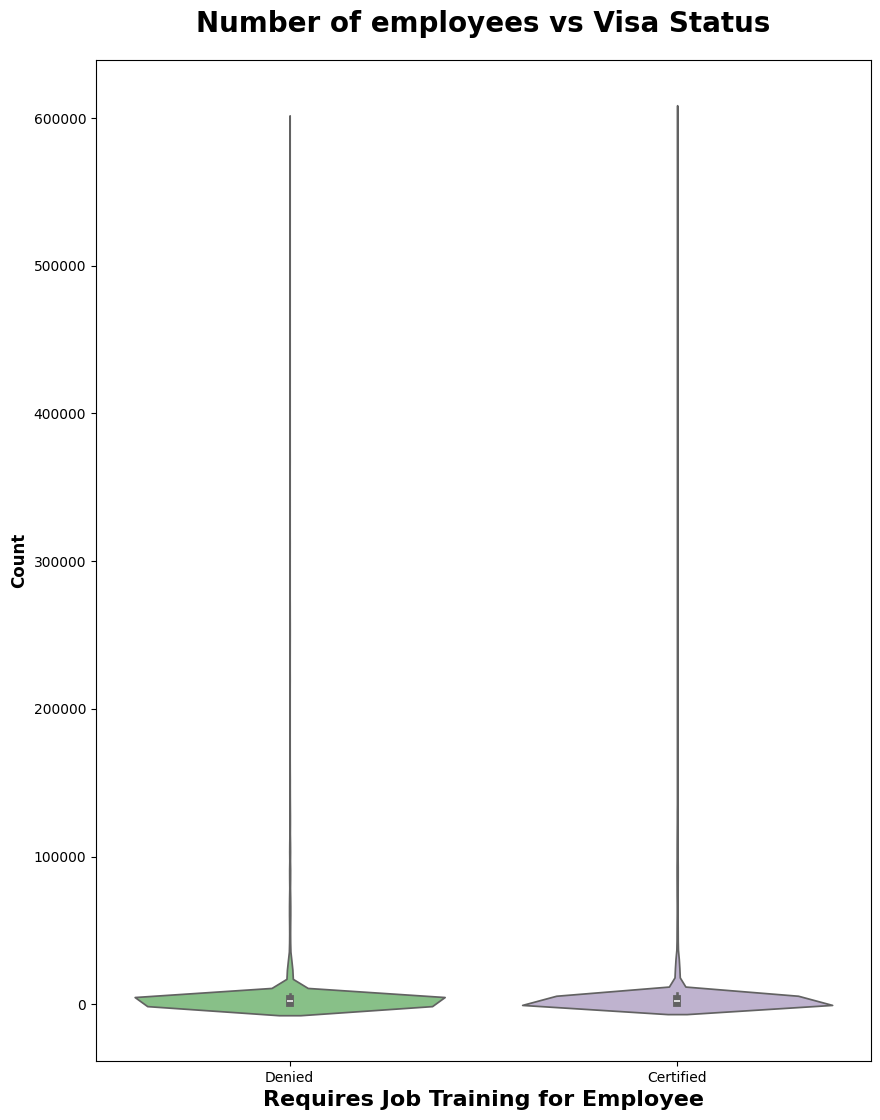

In [9]:
plt.subplots(figsize=(10,13))
sns.violinplot(x="case_status",y='no_of_employees', data=df, palette="Accent")
plt.title("Number of employees vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.ylim()
plt.show()

not much difference

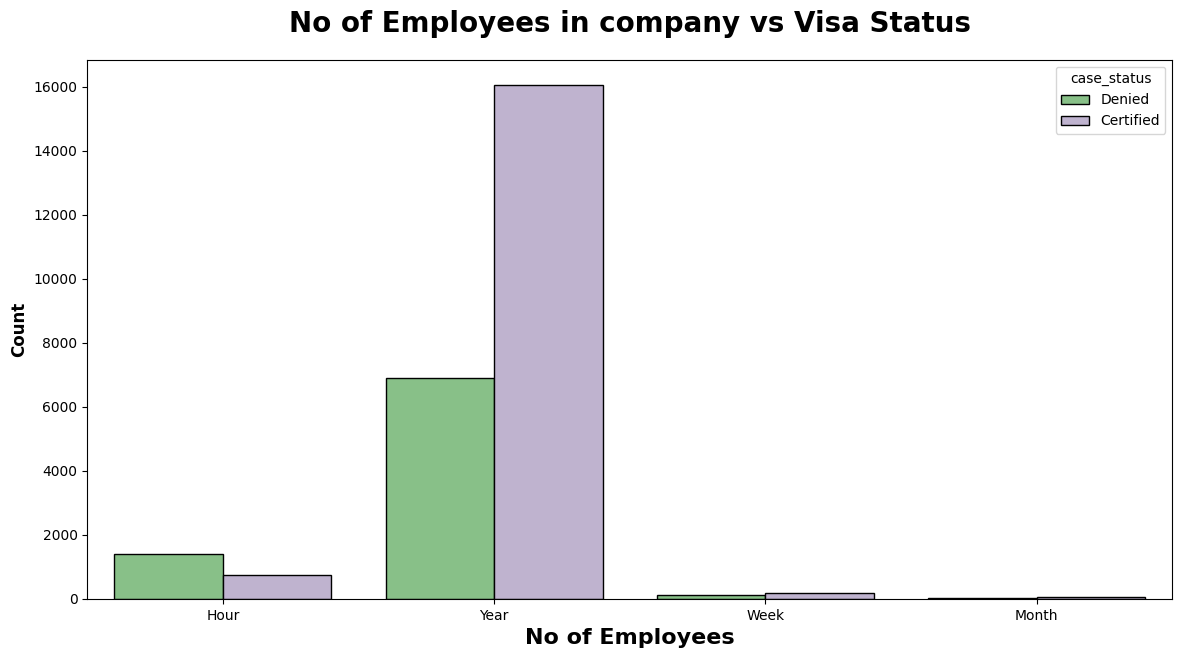

In [10]:
plt.subplots(figsize=(14,7))
sns.countplot(x="unit_of_wage",hue="case_status", data=df,ec='k', palette='Accent')
plt.title("No of Employees in company vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("No of Employees", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

In [ ]:
plt.figure(figsize=[14,7])

(100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts()).plot(
    kind='bar',stacked=True , colormap='Accent')
plt.title("Percentage of Certified vs contract time" , fontsize = 15, fontweight ='bold'  )
order1 = (100*df2[df2["case_status"].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.xlabel('unit_of_wage' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

yearly contract or mostly selected

In [ ]:
Region vs Visa status

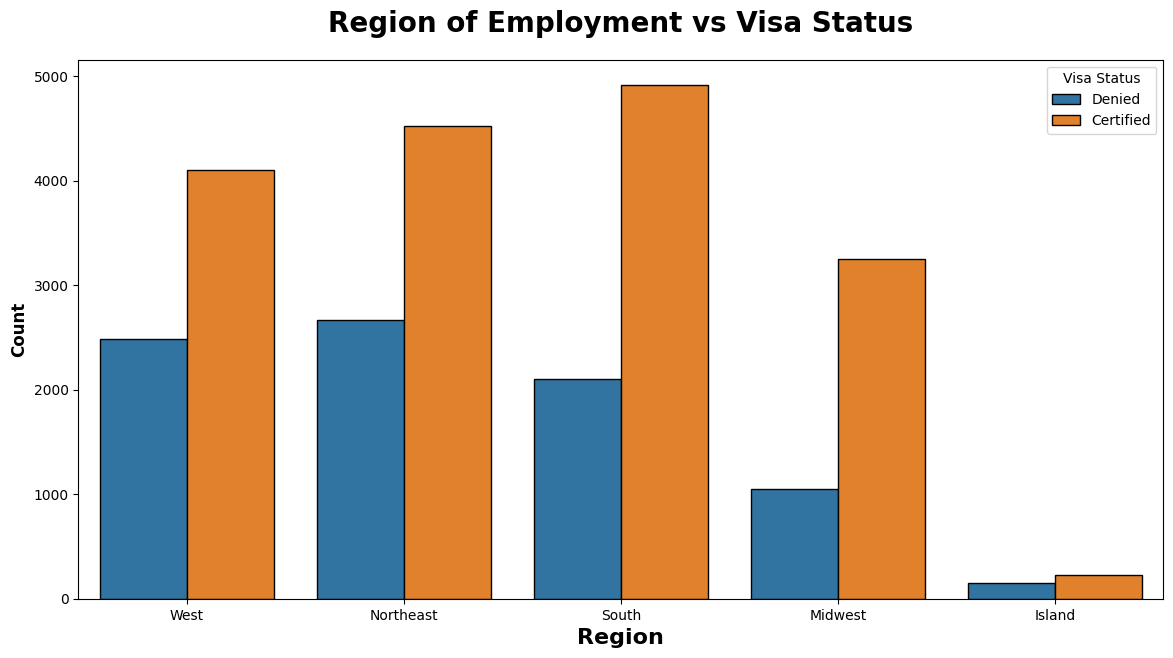

In [11]:
plt.subplots(figsize=(14,7))
sns.countplot(x="region_of_employment",hue="case_status", data=df,ec='k')
plt.title("Region of Employment vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

In [ ]:
south are mostly selected

prevailing wage vs visa stauts

In [13]:
df.groupby('prevailing_wage').case_status.value_counts()

prevailing_wage  case_status
2.1367           Certified      1
2.9561           Denied         1
3.0031           Denied         1
3.3188           Denied         1
3.4889           Certified      1
                               ..
311734.4900      Certified      1
314156.0600      Certified      1
315497.6000      Certified      1
318446.0500      Certified      1
319210.2700      Denied         1
Name: count, Length: 25462, dtype: int64

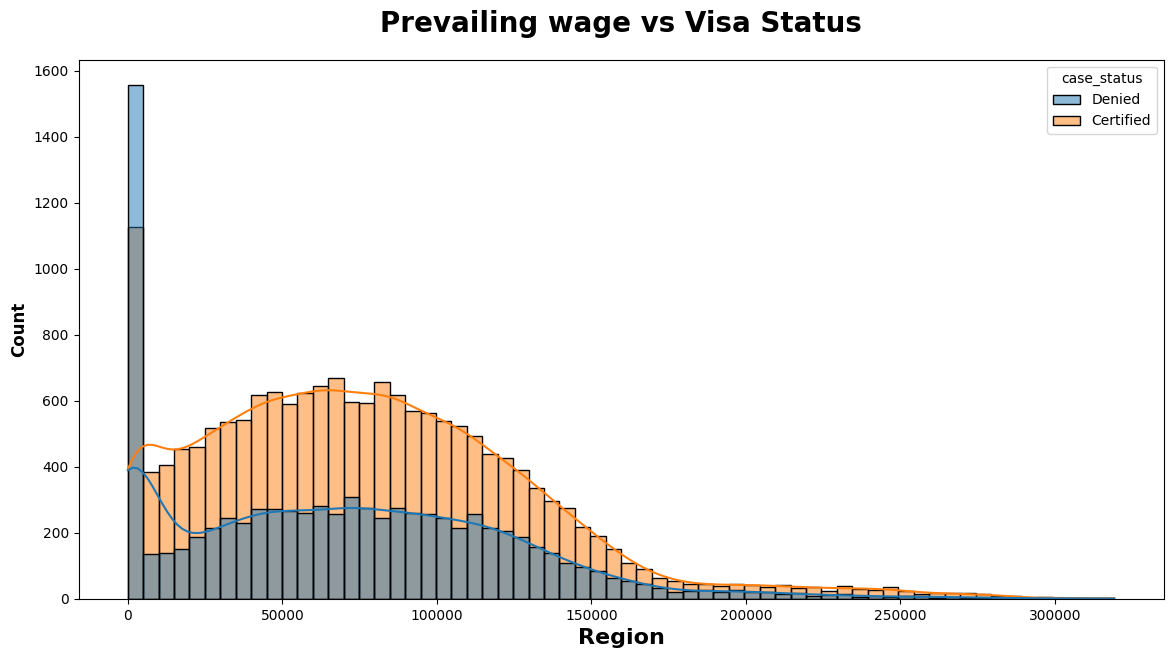

In [14]:
plt.subplots(figsize=(14,7))
sns.histplot(x="prevailing_wage",hue="case_status", data=df, kde=True)
plt.title("Prevailing wage vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

almost same

final report
1)columns to be dropped:case_id,requires_job_training
2)outlier:no_of_employees, prevailing_wage
3)it is imbalanced dataset,that should be handled
4)asia can be treated ohters can be considered as OTHERS.